<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/Parkinson_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

In [4]:
df = pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [10]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [11]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
df.drop('name', axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
df['MDVP:Fo(Hz)'].shape

(195,)

In [16]:
df['MDVP:Fhi(Hz)'].shape

(195,)

In [23]:
df[['MDVP:Fhi(Hz)','MDVP:Fo(Hz)']].corr()

,MDVP:Fhi(Hz),MDVP:Fo(Hz)
MDVP:Fhi(Hz),1.000000,0.400985
MDVP:Fo(Hz),0.400985,1.000000


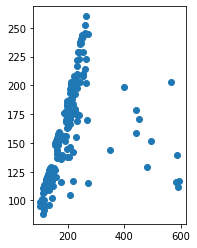

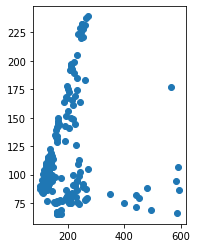

In [37]:
plt.subplot(1,2,1)
plt.scatter(data=df, x='MDVP:Fhi(Hz)', y='MDVP:Fo(Hz)')
plt.show()

plt.subplot(1,2,2)
plt.scatter(data=df, x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)')
plt.show()

In [38]:
df[['MDVP:Fo(Hz)','status']].corr()

,MDVP:Fo(Hz),status
MDVP:Fo(Hz),1.000000,-0.383535
status,-0.383535,1.000000


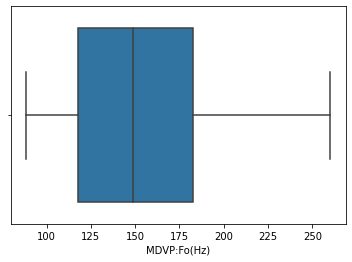

In [46]:
sns.boxplot(data=df, x='MDVP:Fo(Hz)')

In [47]:
import scipy
from scipy import stats

In [48]:
z = stats.zscore(df)
abs_z = np.abs(z)

filtered_entries = (abs_z<3).all(axis=1)
df_filtered = df[filtered_entries]

In [49]:
df.shape

(195, 23)

In [50]:
df_filtered.shape

(181, 23)

In [51]:
df_filtered.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [52]:
df_filtered.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,154.676630,183.737436,116.235254,0.005457,0.000039,0.002839,0.003034,0.008516,0.027603,0.258298,0.014602,0.016667,0.022114,0.043807,0.018116,22.310497,0.745856,0.493856,0.718806,-5.786743,0.221630,2.349643,0.198168
std,41.982512,60.865252,43.971398,0.002959,0.000024,0.001730,0.001769,0.005187,0.015240,0.150077,0.008382,0.009944,0.012561,0.025146,0.020653,3.919846,0.436586,0.104362,0.055225,1.003159,0.081040,0.355373,0.080944
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,11.744000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.274000,133.374000,83.961000,0.003390,0.000020,0.001650,0.001840,0.004960,0.016420,0.145000,0.008120,0.009560,0.013010,0.024360,0.005780,19.517000,0.000000,0.417356,0.676066,-6.486822,0.173319,2.080121,0.134120
50%,149.689000,166.607000,104.315000,0.004760,0.000030,0.002370,0.002580,0.007100,0.022930,0.210000,0.012680,0.013410,0.017710,0.038040,0.010700,22.244000,1.000000,0.487407,0.722356,-5.783272,0.212294,2.344336,0.188180
75%,183.520000,217.455000,135.041000,0.006940,0.000050,0.003680,0.003750,0.011050,0.035270,0.334000,0.018060,0.019940,0.028090,0.054170,0.021830,25.197000,1.000000,0.583390,0.761255,-5.198864,0.266892,2.555477,0.244512
max,260.105000,450.247000,239.170000,0.018720,0.000120,0.010750,0.011540,0.032250,0.079590,0.784000,0.044210,0.049620,0.068240,0.132620,0.118430,33.047000,1.000000,0.685151,0.825288,-2.929379,0.434326,3.317586,0.430788


In [58]:
cols = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR','D2','spread1']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_filtered[cols] = scaler.fit_transform(df_filtered[cols])
df_filtered.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.158451,0.054815,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,0.436042,1,0.414783,0.815285,0.625933,0.266482,0.463578,0.284654
1,0.198327,0.133596,0.278323,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,0.344599,1,0.458359,0.819521,0.772458,0.335590,0.561457,0.368674
2,0.165039,0.083211,0.265288,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,0.418110,1,0.429895,0.825288,0.699381,0.311173,0.485125,0.332634
3,0.165004,0.102631,0.264200,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,0.417782,1,0.434969,0.819235,0.764056,0.334147,0.518539,0.368975
4,0.161150,0.113863,0.260107,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,0.371074,1,0.417356,0.823484,0.837476,0.234513,0.479804,0.410335


In [62]:
df_final = df_filtered

In [63]:
df_final.status.value_counts()

1    135
0     46
Name: status, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [64]:
X = df_final.drop('status', axis=1)
y = df_final['status']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [67]:
x_sm, y_sm = smote.fit_resample(X_train, y_train)

In [68]:
y_sm.value_counts()

1    107
0    107
Name: status, dtype: int64

In [79]:
lgr = LogisticRegression(solver='liblinear')

In [80]:
model1 = lgr.fit(x_sm, y_sm)
y_pred1 = model1.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.82      0.82      0.82        28

    accuracy                           0.73        37
   macro avg       0.63      0.63      0.63        37
weighted avg       0.73      0.73      0.73        37



Text(33.0, 0.5, 'Truth')

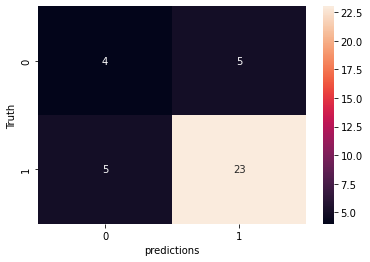

In [90]:
cm = confusion_matrix(y_test, y_pred1)
fig = sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('Truth')

In [82]:
tree = DecisionTreeClassifier()

In [93]:
model2 = tree.fit(x_sm, y_sm)
y_pred2 = model2.predict(X_test)

In [94]:
y_pred2

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [95]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.89      0.89      0.89        28

    accuracy                           0.84        37
   macro avg       0.78      0.78      0.78        37
weighted avg       0.84      0.84      0.84        37



Text(33.0, 0.5, 'Truth')

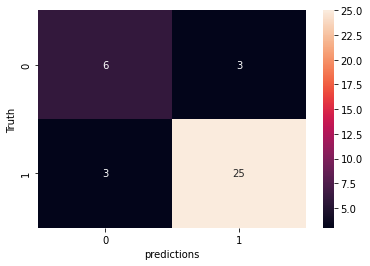

In [96]:
cm = confusion_matrix(y_test, y_pred2)
fig = sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('Truth')

In [92]:
xgb = XGBClassifier()


In [97]:
model3 = xgb.fit(x_sm, y_sm)
y_pred3 = model3.predict(X_test)

In [98]:
y_pred3

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [99]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.96      0.93      0.95        28

    accuracy                           0.92        37
   macro avg       0.88      0.91      0.89        37
weighted avg       0.92      0.92      0.92        37



Text(33.0, 0.5, 'Truth')

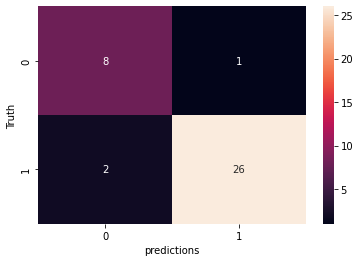

In [101]:
cm = confusion_matrix(y_test, y_pred3)
fig = sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('Truth')

In [102]:
# Xgb turns out to be the best model for prediction of parkinson disease